# WeatherPy- Analysis
----

### Instructions to Grader:
The analyses follows the following main steps-
1. Generate random list of atleast 500 unique cities and their corresponding latitude and longitudes.
2. Perform an API call to determine temperature, humidity, cloudiness, windspeed
3. Saving all data as a csv file and plotting different plots.

Below are the few insights and trends we see in this analyses.



### Insights & Trends

---> Latitude Vs Temperature: As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.

---> Latitude Vs Cloudiness: There is no strong relationship between latitude and cloudiness. However, it is interesting to see that out of the random cities we considered, a strong band of cities in the southern hemishere are cloudy.

--->Latitude Vs Wind speed:There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities ramging from 20 mph to more than 40 mph of wind at this point of time.

--->Latitude Vs Humidty: At this point, it looks like cities in the southern hemisphere are more humid as compared to the cities in northern hemisphere

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time



# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


22


## Generate Cities List and their corresponding latitudes, longitudes and country codes

In [29]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# List for holding revised lat_lngs, country codes for unique cities
rev_lats=[]
rev_lngs=[]
rev_lat_lngs=[]
country_codes=[]

# Initiating iteration with 500 lat_long pairs
num=500

# Defining a while loop to collect unique cities and their corresponding lat& long
while (len(cities) <= 500):

    #def cities_lat_lng(num):
    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=num)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=num)
    lat_lngs = zip(lats, lngs)
    
    # doing a for loop to determine the nearest city based on lat/long combinations
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        country_code=citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to our cities list and generate their lats, longs, country codes
        if city not in cities:
            cities.append(city)
            rev_lat_lngs.append(lat_lng)
            rev_lats.append(lat_lng[0])
            rev_lngs.append(lat_lng[1])
            country_codes.append(country_code)
    # if len of unique cities is <500, then add 100 to num counter and reiterate unique cities list
    num+=100       


#converting all country_codes into upper cases
country_codes= [element.upper() for element in country_codes]
cities=[element.title() for element in cities]

# Reversing zip object to collect lats and longs of unique cities list
#l= list(zip(*rev_lat_lngs))
#print(l)
#rev_lats= (l[0])
#rev_lngs= (l[1])


# Checkpoint for ensuring rev lats, longs, country codes, and unique cities are of same length
print(len(cities))
print(len(rev_lats))
print(len(rev_lats))
print(len(rev_lngs))
print(len(country_codes))
#print(country_codes)
#print(cities)
#print(num)

508
508
508
508
508



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# Declaring Empty lists for collecting temp, humidty, cloudiness, city ID, country name and wind speed
temperature=[]
humidity=[]
cloudiness=[]
wind_speed=[]
city_names_geo=[]
city_ids=[]
country_name=[]
date=[]

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Loop through the list of latitudes and longitudes perform a request for data on each
#for lat in lats and lon in lngs:
for lat, lon in zip(rev_lats,rev_lngs):
    #print(lat)
    #print(lon)
    query_url = f"{url}appid={api_key}&units={units}&lat={lat}&lon={lon}"
    response = requests.get(query_url).json()
    temperature.append(response['main']['temp_max'])
    humidity.append(response['main']['humidity'])
    cloudiness.append(response['clouds']['all'])
    wind_speed.append(response['wind']['speed'])
    city_names_geo.append(response['name'])
    city_ids.append(response['id'])
    #country_name.append(response['country'])
    date.append(response['dt'])

    
# Checkpoint to consider before converting each columns into a dataframe
    
#print(temperature)
#print(humidity)
print(len(lats))
print(len(lngs))
print(len(temperature))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))
print(len(city_names_geo))
print(len(city_ids))
print(len(cities))


#importing and determining the date and time of API pull for our analyses
import datetime

now = datetime.datetime.now()
print(now)


600
600
508
508
508
508
508
508
508
2019-03-03 14:38:47.884860


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
# Converting above API pulled lists into a dataframe and assiging appropriate column names



df = pd.DataFrame({'City_Name' : cities,
                   'Country Codes': country_codes,
                   'Lat' : rev_lats, 
                   'Lng' : rev_lngs,
                   'Date' : date,
                   'Max_Temp' : temperature,
                   'Cloudiness' : cloudiness,
                   'Humidty' : humidity,
                   'Wind Speed' : wind_speed
                  })


# Review the dastaframde
df.head()


,City_Name,Country Codes,Lat,Lng,Date,Max_Temp,Cloudiness,Humidty,Wind Speed
0,Castro,CL,-50.538116,-94.872241,1551652401,48.50,92,99,22.97
1,San Patricio,MX,4.803931,-116.608212,1551652401,82.43,76,96,16.71
2,Atuona,PF,0.333739,-125.071748,1551652401,79.60,56,100,10.00
3,Kropotkin,RU,59.241982,117.610948,1551652402,11.11,68,84,3.40
4,Norman Wells,CA,77.326066,-121.054537,1551652402,-3.21,44,75,23.87


In [32]:
# Dropping all null elements in the dataframe and ensuring number of rows to be atleast 500

df=df.dropna(axis=0, how="any",inplace=False)
df.count()

City_Name     508
Cloudiness    508
Date          508
Humidty       508
Lat           508
Lng           508
Max_Temp      508
Wind Speed    508
Geo_Cities    508
City_ID       508
dtype: int64

In [48]:
# storing all the elements of the dataframe as a csv file
city_list=df.to_csv('citylist.csv',index=False, header=True)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [46]:
# Lisitng various axes for scatter plots

x_axis= df['Lat'].values
t_axis=df['Max_Temp'].values
h_axis=df['Humidty'].values
c_axis=df['Cloudiness'].values
w_axis=df['Wind Speed'].values

#### Latitude vs. Temperature Plot

C:\Users\Pravin\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


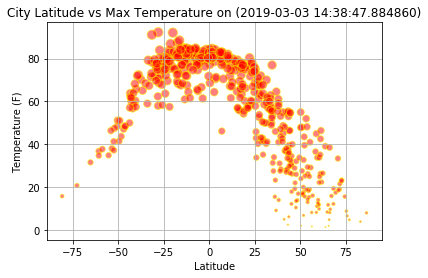

In [42]:
# Plotting scatter plot and adding a grid style
plt.scatter(x_axis, t_axis, marker="o",facecolors="red", edgecolors="yellow", s=t_axis, alpha=0.50)
plt.grid()

# Adding axes names and titles
plt.title(f"City Latitude vs Max Temperature on ({now})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Saving the figure as a png file
plt.savefig("Temperature.png")

# Show the plot
plt.show()

#### Latitude vs. Humidity Plot

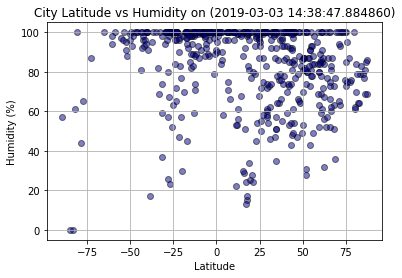

In [43]:
# Plotting scatter plot
plt.scatter(x_axis, h_axis, marker="o", facecolors="darkblue", edgecolors="black", alpha=0.50)
plt.grid()


# Adding axes names and titles
plt.title(f"City Latitude vs Humidity on ({now})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Saving the figure as a png file
plt.savefig("Humidity.png")

# Show the plot
plt.show()


#### Latitude vs. Cloudiness Plot

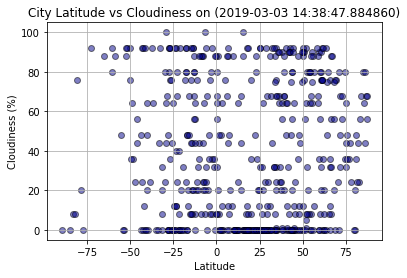

In [44]:
# Plotting scatter plot
plt.scatter(x_axis, c_axis, marker="o", facecolors="darkblue", edgecolors="black", alpha=0.50)
plt.grid()

# Adding axes names and titles
plt.title(f"City Latitude vs Cloudiness on ({now})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Saving the figure as a png file
plt.savefig("Cloudiness.png")

# Show the plot
plt.show()

#### Latitude vs. Wind Speed Plot

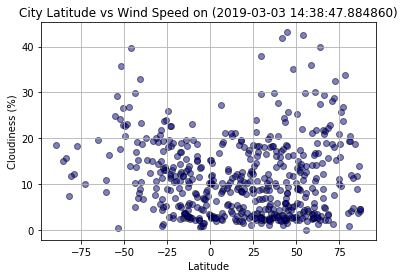

In [47]:
# Plotting scatter plot
plt.scatter(x_axis, w_axis, marker="o", facecolors="darkblue", edgecolors="black", alpha=0.50)
plt.grid()

# Adding axes names and titles
plt.title(f"City Latitude vs Wind Speed on ({now})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Saving the figure as a png file
plt.savefig("Wind_Speed.png")

# Show the plot
plt.show()